In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import scipy.stats as ss
import datetime as dt

### Realizaremos un analisis para una tienda de productos alimenticios para saber el comportamiento de los usuarios con respecto a la aplicacion de la empresa

In [5]:
log= pd.read_csv ('/datasets/logs_exp_us.csv', sep='\t')

### Vamos a hacer un analisis exploratorio de los datos para encontrar anomalias y limpar el dataset si es necesario

In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
def analisis_exploratorio_df(data):
    print(data.head())
    print()
    print(data.info())
    print()
    print(data.isna().sum())
    print()
    print(data.duplicated().sum())

In [8]:
analisis_exploratorio_df (log)

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

413


Realizando un analisis exploratorio breve donde podemos observar que no existen valores nulos, todos los datos parecen ser consistentes tenemos 244,126 filas y 4 columnas, pero si existen 413 duplicados, tendremos que poner en formato correcto la hora de evento

In [9]:
log.columns = 'nombre_evento', 'usuario', 'hora_de_evento' , 'experimento'
log

,nombre_evento,usuario,hora_de_evento,experimento
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [10]:
log['grupo'] = log['experimento'].map({246: 'A', 247: 'A', 248: 'B'})
log.head()

,nombre_evento,usuario,hora_de_evento,experimento,grupo
0,MainScreenAppear,4575588528974610257,1564029816,246,A
1,MainScreenAppear,7416695313311560658,1564053102,246,A
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,B
3,CartScreenAppear,3518123091307005509,1564054127,248,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,B


In [11]:
log['fecha_hora'] = pd.to_datetime(log['hora_de_evento'], unit='s')
log['fecha'] = log['fecha_hora'].dt.date

print(log)

                  nombre_evento              usuario  hora_de_evento  \
0              MainScreenAppear  4575588528974610257      1564029816   
1              MainScreenAppear  7416695313311560658      1564053102   
2       PaymentScreenSuccessful  3518123091307005509      1564054127   
3              CartScreenAppear  3518123091307005509      1564054127   
4       PaymentScreenSuccessful  6217807653094995999      1564055322   
...                         ...                  ...             ...   
244121         MainScreenAppear  4599628364049201812      1565212345   
244122         MainScreenAppear  5849806612437486590      1565212439   
244123         MainScreenAppear  5746969938801999050      1565212483   
244124         MainScreenAppear  5746969938801999050      1565212498   
244125       OffersScreenAppear  5746969938801999050      1565212517   

        experimento grupo          fecha_hora       fecha  
0               246     A 2019-07-25 04:43:36  2019-07-25  
1              

In [12]:
log.duplicated().sum()

413

In [13]:
log_sin_duplicados = log.drop_duplicates()
log_sin_duplicados.duplicated().sum()

0

Hemos realizado la limpieza del data set agregado por grupo los experimentos 246, 247 y 248, se agrego una columna de fecha y hora y una columna separada para las fechas recordando que estas fechas salen de la columna 'hora_de_evento', realizado este hemos procedido a eliminar valores duplicados los cuales eran 413

In [14]:
numero_eventos = log.shape[0]

# Número total de usuarios únicos
eventos_unicos = log['nombre_evento'].nunique()
numero_usuarios = log['usuario'].nunique()
numero_usuarios_1= log['usuario'].count()
# Promedio de eventos por usuario
promedio_eventos_por_usuario = numero_eventos / numero_usuarios

# Mostrar los resultados
print(f"El número total de eventos es: {numero_eventos}")
print(f"El número de eventos únicos es: {eventos_unicos}")
print(f"El número total de usuarios únicos es: {numero_usuarios}")
print(f"El número total de usuarios es: {numero_usuarios_1}")
print(f"El promedio de eventos por usuario es: {promedio_eventos_por_usuario:.2f}")

El número total de eventos es: 244126
El número de eventos únicos es: 5
El número total de usuarios únicos es: 7551
El número total de usuarios es: 244126
El promedio de eventos por usuario es: 32.33


In [15]:
log['hora_de_evento'] = pd.to_datetime(log['hora_de_evento'], unit='s')

# Calcular la fecha mínima y máxima
fecha_inicio = log['hora_de_evento'].min()
fecha_fin = log['hora_de_evento'].max()

# Mostrar los resultados
print(f"El periodo de tiempo cubierto por los datos es desde {fecha_inicio} hasta {fecha_fin}.")

El periodo de tiempo cubierto por los datos es desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17.


In [16]:
print(f'valor_minimo en fecha_hora : {log["hora_de_evento"].min()}')
print(f'valor_maximo en fecha_hora: {log["hora_de_evento"].max()}')

valor_minimo en fecha_hora : 2019-07-25 04:43:36
valor_maximo en fecha_hora: 2019-08-07 21:15:17


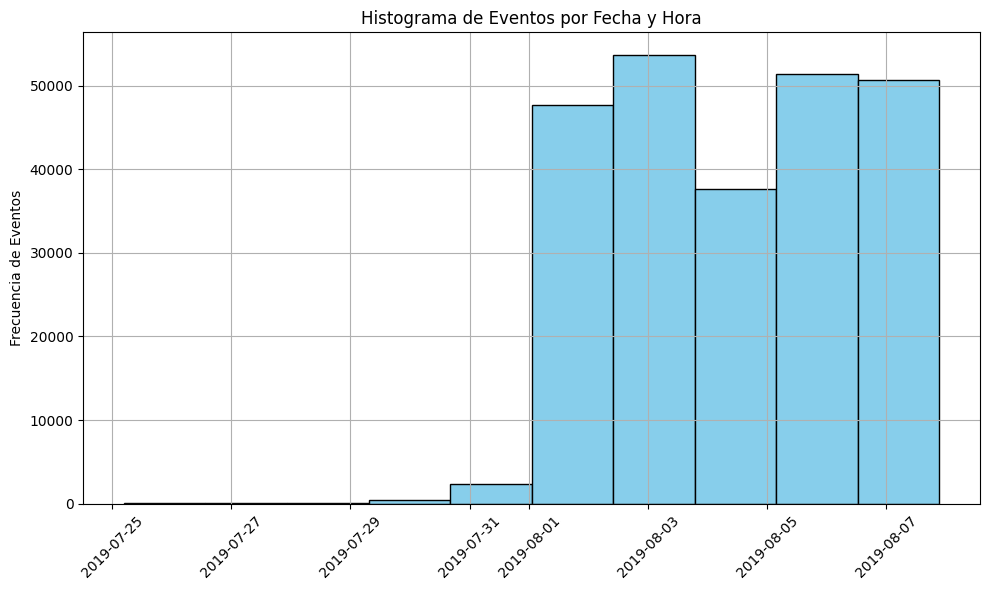

In [17]:
plt.figure(figsize=(10, 6))
log['fecha_hora'].hist(bins=10, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Eventos por Fecha y Hora')
plt.ylabel('Frecuencia de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La grafica nos muestra un histograma de eventos por fecha y hora respecto a la frecuancia de eventos donde el 2019-08-01 es donde comienza a haber un incremento mayor hasta la ultima fecha y hora registrada en el data set, podemos obser que no tenemos todos los datos completos para este periodo ya que de inicio o del lado izquiedo son muy pocos los datos sin embargo como se menciono a mitad del periodo estudiado tenemos una frecuancia de eventos grande por lo cual se asume que hay absolucencia de datos y tenemos un sesgo en la informacion.

In [18]:
frecuencia_por_fecha = log_sin_duplicados['fecha'].value_counts().sort_index()
frecuencia_por_fecha

2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: fecha, dtype: int64

Con estos datos podemos comprobar que efectivamente no tenemso datos suficientes y esto provocaria tener un sesgo en la informacion
por lo cual eliminaremos ciertos periodos para no tener este sesgo 

In [19]:
log['fecha'] = pd.to_datetime(log['fecha'])
log_nuevas_fechas = log[(log['fecha'] < '2019-07-25') | (log['fecha'] > '2019-07-31')]
log_nuevas_fechas.head()

,nombre_evento,usuario,hora_de_evento,experimento,grupo,fecha_hora,fecha
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,A,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,A,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,A,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,A,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,A,2019-08-01 00:08:59,2019-08-01


In [20]:
log_nuevas_fechas['experimento'].unique()

array([246, 247, 248])

In [21]:
print(f'valor_minimo en fecha_hora : {log_nuevas_fechas["hora_de_evento"].min()}')
print(f'valor_maximo en fecha_hora: {log_nuevas_fechas["hora_de_evento"].max()}')
print(f"El periodo de tiempo cubierto por las nuevas fechas es desde {fecha_inicio} hasta {fecha_fin}.")

valor_minimo en fecha_hora : 2019-08-01 00:07:28
valor_maximo en fecha_hora: 2019-08-07 21:15:17
El periodo de tiempo cubierto por las nuevas fechas es desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17.


Al realizar un filtro para trabajar con los nuevos periodos de fechas hemos perdido cierto valores del data set original, apesar de esto aun podemos trabajar con estos datos ya que aun contamos con los tres grupos experimentales por los cual de momento aun podemos continuar con el analisis

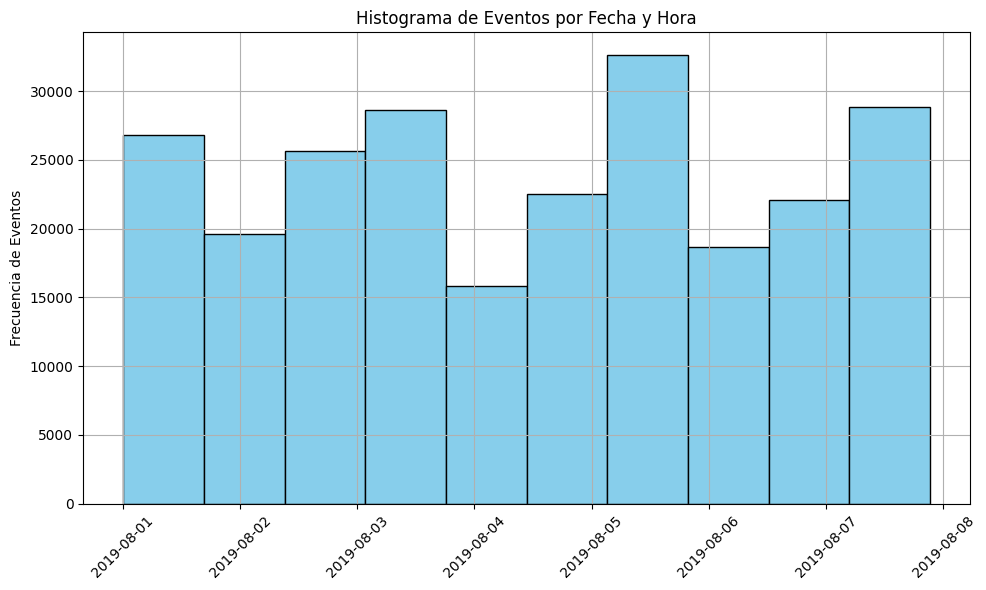

In [22]:
plt.figure(figsize=(10, 6))
log_nuevas_fechas['fecha_hora'].hist(bins=10, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Eventos por Fecha y Hora')
plt.ylabel('Frecuencia de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

con las nuevas fechas de estudios podemos observar en el histograma que la informacion es mas consistente y ya no existe un sesgo tan grande como se mostro en la grafica anterior, a pesar de que si se perdio parte de los datos aun contamos con los tres grupos experimentales por lo cual analizaremos este nuevo perido de fecha que es del 2019-08-01 al 2019-08-08.

In [23]:
event_frequency = log_nuevas_fechas["nombre_evento"].value_counts()
event_frequency

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: nombre_evento, dtype: int64

In [24]:
frecuencia_de_eventos = log_nuevas_fechas.groupby('nombre_evento')['usuario'].agg(['count', 'nunique'])
frecuencia_de_eventos.columns=['n_eventos', 'n_usuarios']
frecuencia_de_eventos.sort_values(by='n_usuarios', ascending = False).reset_index()

,nombre_evento,n_eventos,n_usuarios
0,MainScreenAppear,117431,7419
1,OffersScreenAppear,46350,4593
2,CartScreenAppear,42365,3734
3,PaymentScreenSuccessful,34113,3539
4,Tutorial,1039,840


In [25]:
frecuencia_de_eventos['sesiones_por_evento'] = frecuencia_de_eventos['n_eventos'] / frecuencia_de_eventos['n_usuarios']
frecuencia_de_eventos.reset_index()

,nombre_evento,n_eventos,n_usuarios,sesiones_por_evento
0,CartScreenAppear,42365,3734,11.345742
1,MainScreenAppear,117431,7419,15.828414
2,OffersScreenAppear,46350,4593,10.091444
3,PaymentScreenSuccessful,34113,3539,9.639164
4,Tutorial,1039,840,1.236905


In [26]:
total_usuarios_unicos = log_nuevas_fechas['usuario'].nunique()

# Calcular la proporción de usuarios que realizaron cada acción
frecuencia_de_eventos['proporcion_usuarios'] = frecuencia_de_eventos['n_usuarios'] / total_usuarios_unicos

frecuencia_de_eventos.reset_index()

,nombre_evento,n_eventos,n_usuarios,sesiones_por_evento,proporcion_usuarios
0,CartScreenAppear,42365,3734,11.345742,0.495620
1,MainScreenAppear,117431,7419,15.828414,0.984736
2,OffersScreenAppear,46350,4593,10.091444,0.609636
3,PaymentScreenSuccessful,34113,3539,9.639164,0.469737
4,Tutorial,1039,840,1.236905,0.111495


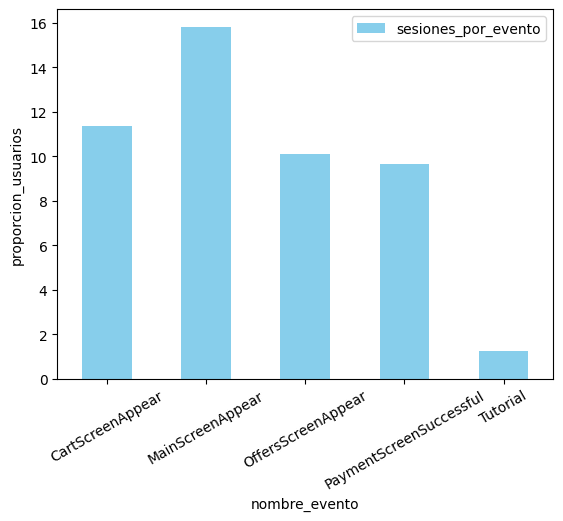

In [27]:
plt.figsize=(12,5)
frecuencia_de_eventos["sesiones_por_evento"].plot(kind="bar", ylabel = 'proporcion_usuarios', color="skyblue")
plt.legend()
plt.xticks(rotation = 30)
plt.show()

Como se observa en la grafica tenemos la cantidad por evento, respecto a la proporcion del numero de usuarios, donde se muestra los difenrentes eventos y cuales de estos han sido mas utilizados por los usuaios

In [28]:
orden_embudo = [
    'Tutorial',
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful',
]

# Filtrar el DataFrame por los eventos del embudo y ordenarlos
embudo = frecuencia_de_eventos.loc[orden_embudo].copy()

# Calcular la proporción de retención entre etapas
embudo['proporcion_retenidos'] = embudo['n_usuarios'].shift(-1) / embudo['n_usuarios']

# Mostrar el embudo con las proporciones calculadas
embudo.sort_values(by = 'proporcion_retenidos').reset_index()

,nombre_evento,n_eventos,n_usuarios,sesiones_por_evento,proporcion_usuarios,proporcion_retenidos
0,MainScreenAppear,117431,7419,15.828414,0.984736,0.619086
1,OffersScreenAppear,46350,4593,10.091444,0.609636,0.812976
2,CartScreenAppear,42365,3734,11.345742,0.495620,0.947777
3,Tutorial,1039,840,1.236905,0.111495,8.832143
4,PaymentScreenSuccessful,34113,3539,9.639164,0.469737,NaN


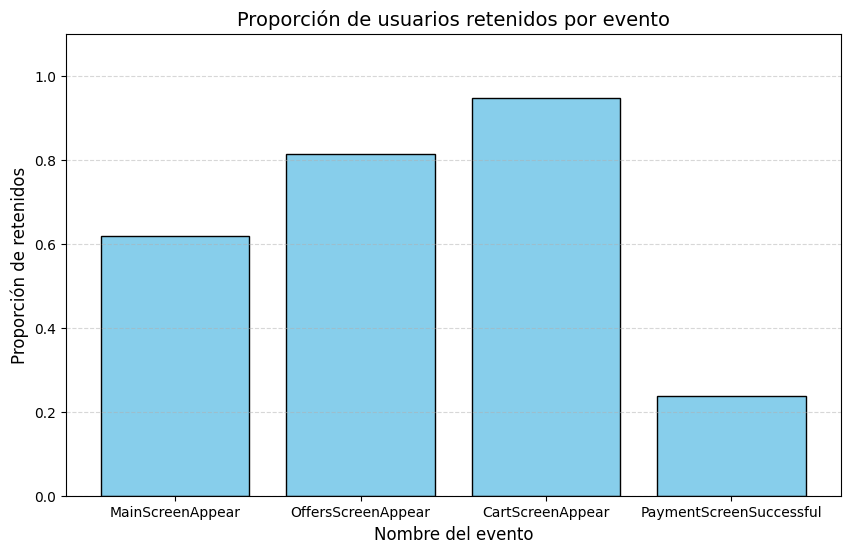

In [29]:
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
proporcion_retenidos = [0.619086, 0.812976, 0.947777, 0.237355]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(eventos, proporcion_retenidos, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Proporción de usuarios retenidos por evento', fontsize=14)
plt.xlabel('Nombre del evento', fontsize=12)
plt.ylabel('Proporción de retenidos', fontsize=12)
plt.ylim(0, 1.1)  # Ajustar el rango del eje Y para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

En la grafica se muetsra la relacion que existe entre la porporsion de usuarios retenidos por evento con respecto a las siguientes etapas ahasta realizar una compra exitosa
Como se observa en la grafica, apartir de la pantalla principal se incrementa la proporcion de usuarios retenidos sin embargo 
la etapa donde mas usuario se pierden es entre la patalla de carrito hacia la pantalla de pago exitoso, es decir que muy pocos usuarios terminan de realizar una compra

In [31]:
usuarios_inicio = frecuencia_de_eventos.loc['MainScreenAppear', 'n_usuarios']
usuarios_final = frecuencia_de_eventos.loc['PaymentScreenSuccessful', 'n_usuarios']

# Calcular el porcentaje
porcentaje_completan_compra = (usuarios_final / usuarios_inicio) * 100
#print(f"Porcentaje de usuarios que completan el viaje: {porcentaje_completan_viaje:.2f}%")
print(f"Porcentaje de usuarios que completan el viaje: {porcentaje_completan_compra:.2f}%")

Porcentaje de usuarios que completan el viaje: 47.70%


In [33]:
usuarios_inicio = 7419  # Usuarios únicos en MainScreenAppear
porcentaje_completan_compra = 47.71  # Porcentaje calculado

# Calcular el número de usuarios
#usuarios_completan_viaje = usuarios_inicio * (porcentaje_completan_viaje / 100)
usuarios_completan_viaje = usuarios_inicio * (porcentaje_completan_compra / 100)
print(f"Usuarios que completan el viaje: {usuarios_completan_viaje:.0f}")

Usuarios que completan el viaje: 3540


El pocentaje de usuarios que completan todo el proceso es el 47.7 % es decir de los 7419 usuarios que iniciarion el proceso a partir de la nueva fecha de estudio (2019-08-01), solo 3540 terminaron por realizar el pago

In [34]:
log_nuevas_fechas

,nombre_evento,usuario,hora_de_evento,experimento,grupo,fecha_hora,fecha
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,A,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,A,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,A,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,A,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,A,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,A,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,A,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,A,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,A,2019-08-07 21:14:58,2019-08-07


In [35]:
print(log_nuevas_fechas.groupby('experimento')['usuario'].nunique())

experimento
246    2484
247    2513
248    2537
Name: usuario, dtype: int64


In [37]:
alpha=0.05
sample_1 = log_nuevas_fechas.query("grupo == 'A'")["experimento"]
print(sample_1)
sample_2 = log_nuevas_fechas.query("grupo == 'A'")["experimento"]
print(sample_2)

2828      246
2829      246
2830      246
2831      246
2832      247
         ... 
244121    247
244122    246
244123    246
244124    246
244125    246
Name: experimento, Length: 156572, dtype: int64
2828      246
2829      246
2830      246
2831      246
2832      247
         ... 
244121    247
244122    246
244123    246
244124    246
244125    246
Name: experimento, Length: 156572, dtype: int64


In [38]:
from scipy import stats as st

resultados=st.ttest_ind(sample_1, sample_2, equal_var=False)
resultados_levene=st.levene(sample_1, sample_2)
print(f"p-value: {resultados.pvalue}")
print(f"p-value: {resultados_levene.pvalue}")

if resultados.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 1")
else:
    print("No podemos rechazar la hipotesis nula")

p-value: 1.0
p-value: 1.0
No podemos rechazar la hipotesis nula


El valor-p es muy alto, esto indica que no hay evidencia suficiente para rechazar la hipótesis nula de que las proporciones de eventos entre los grupos 246 y 247 son iguales. En otras palabras, no hay diferencia estadísticamente significativa entre las muestras de los dos grupos.

In [39]:
evento_mas_popular = log_nuevas_fechas.groupby('nombre_evento')['usuario'].nunique().reset_index().sort_values('usuario',ascending = False)
evento_mas_popular

,nombre_evento,usuario
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

# Paso 1: Identificar el evento más popular
event_counts = log_nuevas_fechas['nombre_evento'].value_counts()
most_popular_event = event_counts.idxmax()

# Paso 2: Filtrar por el evento más popular y contar usuarios únicos por experimento
popular_event_data = log_nuevas_fechas[log_nuevas_fechas['nombre_evento'] == most_popular_event]
user_counts = popular_event_data.groupby(['experimento'])['usuario'].nunique()

# Paso 3: Calcular proporciones
total_users_by_experiment = log_nuevas_fechas.groupby('experimento')['usuario'].nunique()
proportions = user_counts / total_users_by_experiment

# Paso 4: Comparar estadísticamente (Chi-cuadrado)
contingency_table = pd.DataFrame({
    'Realizaron Evento': user_counts,
    'No Realizaron Evento': total_users_by_experiment - user_counts
}).T

chi2, p, _, _ = chi2_contingency(contingency_table)

# Resultado del análisis para el evento más popular
print(f"Evento más popular: {most_popular_event}")
print(f"Proporciones por experimento:\n{proportions}")
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

# Paso 5: Crear una función para repetir el análisis para cualquier evento
def analyze_event_by_experiment(event_name, data):
    event_data = data[data['nombre_evento'] == event_name]
    user_counts = event_data.groupby('experimento')['usuario'].nunique()
    total_users_by_experiment = data.groupby('experimento')['usuario'].nunique()
    proportions = user_counts / total_users_by_experiment
    contingency_table = pd.DataFrame({
        'Realizaron Evento': user_counts,
        'No Realizaron Evento': total_users_by_experiment - user_counts
    }).T
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return {
        'evento': event_name,
        'proporciones': proportions,
        'chi2': chi2,
        'p_valor': p
    }

# Repetir para todos los eventos
results = [analyze_event_by_experiment(event, log_nuevas_fechas) for event in log_nuevas_fechas['nombre_evento'].unique()]

# Mostrar los resultados
for result in results:
    print(result)

Evento más popular: MainScreenAppear
Proporciones por experimento:
experimento
246    0.986312
247    0.985277
248    0.982657
Name: usuario, dtype: float64
Chi-cuadrado: 1.1892664303116052, p-valor: 0.5517649077633189
{'evento': 'Tutorial', 'proporciones': experimento
246    0.111916
247    0.112614
248    0.109972
Name: usuario, dtype: float64, 'chi2': 0.09560801675198974, 'p_valor': 0.9533206116237533}
{'evento': 'MainScreenAppear', 'proporciones': experimento
246    0.986312
247    0.985277
248    0.982657
Name: usuario, dtype: float64, 'chi2': 1.1892664303116052, 'p_valor': 0.5517649077633189}
{'evento': 'OffersScreenAppear', 'proporciones': experimento
246    0.620773
247    0.604855
248    0.603469
Name: usuario, dtype: float64, 'chi2': 1.9415079158816568, 'p_valor': 0.37879733315487885}
{'evento': 'CartScreenAppear', 'proporciones': experimento
246    0.509662
247    0.492638
248    0.484825
Name: usuario, dtype: float64, 'chi2': 3.2313847242665346, 'p_valor': 0.198753013731591

El evento más frecuente es MainScreenAppear. El p-valor es 0.55, lo que indica que no hay una diferencia estadísticamente significativa entre los tres experimentos para este evento.

Tutorial: con un p-valor de 0.95, lo que indica que no hay diferencias significativas entre los experimentos para este evento.

OffersScreenAppear: el p-valor de 0.38 también indica que no hay diferencias significativas.

CartScreenAppear: el p-valor de 0.20 indica que la diferencia no es estadísticamente significativa.

PaymentScreenSuccessful: el p-valor de 0.25 muestra que no hay evidencia suficiente para afirmar que haya diferencias significativas.

In [41]:
experimento = [246, 247, 248] 
control = [246]

altered_data = log_nuevas_fechas[log_nuevas_fechas['experimento'].isin(experimento)]


control_data = log_nuevas_fechas[log_nuevas_fechas['experimento'].isin(control)]


def analyze_event_by_experiment(event_name, data):
    event_data = data[data['nombre_evento'] == event_name]
    user_counts = event_data.groupby('experimento')['usuario'].nunique()
    total_users_by_experiment = data.groupby('experimento')['usuario'].nunique()
    proportions = user_counts / total_users_by_experiment
    contingency_table = pd.DataFrame({
        'Realizaron Evento': user_counts,
        'No Realizaron Evento': total_users_by_experiment - user_counts
    }).T
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return {
        'evento': event_name,
        'proporciones': proportions,
        'chi2': chi2,
        'p_valor': p
    }


control_results = [analyze_event_by_experiment(event, control_data) for event in log_nuevas_fechas['nombre_evento'].unique()]

altered_results = [analyze_event_by_experiment(event, altered_data) for event in log_nuevas_fechas['nombre_evento'].unique()]

combined_control_data = log_nuevas_fechas[log_nuevas_fechas['experimento'] == 246]
combined_control_results = [analyze_event_by_experiment(event, combined_control_data) for event in log_nuevas_fechas['nombre_evento'].unique()]

print("Resultados para el grupo de control:")
for result in control_results:
    print(result)

print("\nResultados para los experimentos con fuentes alteradas (246, 247, 248):")
for result in altered_results:
    print(result)

print("\nResultados combinados para los grupos de control:")
for result in combined_control_results:
    print(result)

Resultados para el grupo de control:
{'evento': 'Tutorial', 'proporciones': experimento
246    0.111916
Name: usuario, dtype: float64, 'chi2': 0.0, 'p_valor': 1.0}
{'evento': 'MainScreenAppear', 'proporciones': experimento
246    0.986312
Name: usuario, dtype: float64, 'chi2': 0.0, 'p_valor': 1.0}
{'evento': 'OffersScreenAppear', 'proporciones': experimento
246    0.620773
Name: usuario, dtype: float64, 'chi2': 0.0, 'p_valor': 1.0}
{'evento': 'CartScreenAppear', 'proporciones': experimento
246    0.509662
Name: usuario, dtype: float64, 'chi2': 0.0, 'p_valor': 1.0}
{'evento': 'PaymentScreenSuccessful', 'proporciones': experimento
246    0.483092
Name: usuario, dtype: float64, 'chi2': 0.0, 'p_valor': 1.0}

Resultados para los experimentos con fuentes alteradas (246, 247, 248):
{'evento': 'Tutorial', 'proporciones': experimento
246    0.111916
247    0.112614
248    0.109972
Name: usuario, dtype: float64, 'chi2': 0.09560801675198974, 'p_valor': 0.9533206116237533}
{'evento': 'MainScreenAp

Tutorial: p-valor = 0.953, lo que indica que no hay diferencias significativas entre los experimentos (246, 247, 248) respecto a este evento.

MainScreenAppear: p-valor = 0.552, lo que indica que las diferencias entre los experimentos tampoco son estadísticamente significativas.

OffersScreenAppear: p-valor = 0.379, similarmente no hay diferencias significativas entre los experimentos.

CartScreenAppear p-valor = 0.199, no hay diferencias significativas.

PaymentScreenSuccessful: p-valor = 0.251, tampoco se encuentran diferencias significativas.

Todas las pruebas se han realizado con una significancia de alpha = 0.05

In [42]:
def analyze_event(event_name, data, alpha=0.1):
    event_data = data[data['nombre_evento'] == event_name]
    user_counts = event_data.groupby('experimento')['usuario'].nunique()
    total_users_by_experiment = data.groupby('experimento')['usuario'].nunique()
    proportions = user_counts / total_users_by_experiment


    contingency_table = pd.DataFrame({
        'Realizaron Evento': user_counts,
        'No Realizaron Evento': total_users_by_experiment - user_counts
    }).T


    chi2, p, _, _ = chi2_contingency(contingency_table)

    adjusted_alpha = alpha / len(data['nombre_evento'].unique())

    return {
        'evento': event_name,
        'proporciones': proportions,
        'chi2': chi2,
        'p_valor': p,
        'ajuste_alpha': adjusted_alpha,
        'conclusion': 'Rechazamos H0' if p < adjusted_alpha else 'No rechazamos H0'
    }

event_names = log_nuevas_fechas['nombre_evento'].unique()
results = [analyze_event(event, log_nuevas_fechas, alpha=0.1) for event in event_names]

for result in results:
    print(f"Evento: {result['evento']}")
    print(f"Proporciones: \n{result['proporciones']}")
    print(f"Chi-cuadrado: {result['chi2']}")
    print(f"p-valor: {result['p_valor']}")
    print(f"Nivel de significancia ajustado (Bonferroni): {result['ajuste_alpha']}")
    print(f"Conclusión: {result['conclusion']}")
    print("-" * 50)

Evento: Tutorial
Proporciones: 
experimento
246    0.111916
247    0.112614
248    0.109972
Name: usuario, dtype: float64
Chi-cuadrado: 0.09560801675198974
p-valor: 0.9533206116237533
Nivel de significancia ajustado (Bonferroni): 0.02
Conclusión: No rechazamos H0
--------------------------------------------------
Evento: MainScreenAppear
Proporciones: 
experimento
246    0.986312
247    0.985277
248    0.982657
Name: usuario, dtype: float64
Chi-cuadrado: 1.1892664303116052
p-valor: 0.5517649077633189
Nivel de significancia ajustado (Bonferroni): 0.02
Conclusión: No rechazamos H0
--------------------------------------------------
Evento: OffersScreenAppear
Proporciones: 
experimento
246    0.620773
247    0.604855
248    0.603469
Name: usuario, dtype: float64
Chi-cuadrado: 1.9415079158816568
p-valor: 0.37879733315487885
Nivel de significancia ajustado (Bonferroni): 0.02
Conclusión: No rechazamos H0
--------------------------------------------------
Evento: CartScreenAppear
Proporciones:

Para todos los eventos no se encontro una diferencia significativa al 0.1

## Conclusion
Hemos realizado un analisis para para una tienda de productos alimenticios para saber el comportamiento de los usuarios con respecto a la aplicacion de la empresa, realizamos un analisis exploratorio para encontrar datos que pudieran ensuciar nuestro analizis, uno de estos fueron los valores duplicados que son 413, una vez realizado nuestro analisis exploratorio encontramos mediante una grafica de histograma que existian un sesgo en los datos y esto podria causarnos problemas, por lo cual analizaremos este nuevo perido de fecha que es del 2019-08-01 al 2019-08-08, y revisando que no se perdieran los  grupos a experimentar (246, 247 y 248). Se realizaron pruebas estadisticas para saber si hay una diferencia estadísticamente significativa entre las muestras con un alpha = 0.05 y se encontro que el evento más frecuente es MainScreenAppea.

Al realizar todas las prueba se observo que estas no tenian diferiencia significativa por lo cual para no caer en un error tipo I. se realizaron nuevamente las puebas de hipotesis con un nivel de significancia del 0.1, sin embargo no hay evidencia suficiente para afirmar que los experimentos 246, 247 y 248 tengan un impacto distinto en la realización de los eventos analizados. Las diferencias observadas en las proporciones entre los experimentos son pequeñas y no alcanzan significancia estadística con el ajuste podemos concluir que los cambios realizados en los experimentos no tienen un efecto significativo sobre la participación en los eventos.

